## **<font color='white gray'>Business Analytics for Data Science </font>**
### **<font color='white gray'>RFM Analysis (Recency, Frequency, Monetary Value) for the Marketing Area</font>**

## **Installing and Loading Packages**

In [1]:
# To update a package, run the command below in the terminal or command prompt:
# pip install -U package_name

# To install a specific version of a package, run the command below in the terminal or command prompt:
# !pip install package_name==desired_version

# After installing or updating the package, restart the Jupyter Notebook.

# Install the watermark package.
# This package is used to record the versions of other packages used in this Jupyter Notebook.
!pip install -q -U watermark

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 25.4 MB/s eta 0:00:00


In [2]:
# https://pypi.org/project/squarify/
!pip install -q squarify

In [3]:
#1 Imports
import sklearn
import squarify
import pandas as pd
import seaborn as sns
import plotly.graph_objects as go
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from datetime import datetime, timedelta

In [4]:
# Versions of the packages used in this Jupyter Notebook
%reload_ext watermark
%watermark -a "panData"

Author: panData



## **RFM Analysis (Recency, Frequency, Monetary Value)**


## **Loading and Exploring the Data**

In [5]:
#2 Load the dataset
df = pd.read_csv("dataset.csv")

In [6]:
#3 Shape
df.shape

(41201, 53)

In [7]:
#4 Data sample
df.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,seller_city,seller_state,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017.0,10.0,0.0,10.0,Mon,Oct
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017.0,10.0,0.0,10.0,Mon,Oct
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017.0,10.0,0.0,10.0,Mon,Oct
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,Maua,SP,housewares,1.0,2017.0,8.0,1.0,18.0,Tue,Aug
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,Maua,SP,housewares,0.0,2017.0,8.0,2.0,18.0,Wed,Aug


In [8]:
#5 Info
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41201 entries, 0 to 41200
Data columns (total 53 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   order_id                       41201 non-null  object 
 1   order_id3                      41201 non-null  object 
 2   customer_id3                   41201 non-null  object 
 3   order_status                   41201 non-null  object 
 4   order_purchase_timestamp       41201 non-null  object 
 5   order_approved_at              41201 non-null  object 
 6   order_delivered_carrier_date   41201 non-null  object 
 7   order_delivered_customer_date  41201 non-null  object 
 8   order_estimated_delivery_date  41201 non-null  object 
 9   order_item_id                  41201 non-null  float64
 10  product_id3                    41201 non-null  object 
 11  seller_id3                     41201 non-null  object 
 12  shipping_limit_date            41201 non-null 

## **Feature Engineering with Date-Type Columns**

The purchase date is important for our analysis. We will extract this information from the `order_purchase_timestamp` column and then create two new columns.

In [9]:
#6 Convert 'order_purchase_timestamp' to datetime without specifying the format
df['order_purchase_timestamp'] = pd.to_datetime(df['order_purchase_timestamp'])

In [10]:
#7 Extract only the date from the timestamp and create a new column called 'order_purchase_date'
df['order_purchase_date'] = df['order_purchase_timestamp'].dt.date

In [11]:
#8 Create the 'InvoiceDate' column
df['InvoiceDate'] = df.order_purchase_date.apply(lambda x: datetime.strftime(x, '%Y-%m-%d'))
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'])

In [12]:
df.head()

,order_id,order_id3,customer_id3,order_status,order_purchase_timestamp,order_approved_at,order_delivered_carrier_date,order_delivered_customer_date,order_estimated_delivery_date,order_item_id,...,product_category_name_english,review_response_time,order_purchase_year,order_purchase_month,order_purchase_dayofweek,order_purchase_hour,order_purchase_day,order_purchase_mon,order_purchase_date,InvoiceDate
0,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017.0,10.0,0.0,10.0,Mon,Oct,2017-10-02,2017-10-02
1,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017.0,10.0,0.0,10.0,Mon,Oct,2017-10-02,2017-10-02
2,ON34305,e481f51cbdc54678b7cc49136f2d6af7,9ef432eb6251297304e76186b10a928d,delivered,2017-10-02 10:56:33,2017-10-02 11:07:15,2017-10-04 19:55:00,2017-10-10 21:25:13,2017-10-18 00:00:00,1.0,...,housewares,1.0,2017.0,10.0,0.0,10.0,Mon,Oct,2017-10-02,2017-10-02
3,ON40291,128e10d95713541c87cd1a2e48201934,a20e8105f23924cd00833fd87daa0831,delivered,2017-08-15 18:29:31,2017-08-15 20:05:16,2017-08-17 15:28:33,2017-08-18 14:44:43,2017-08-28 00:00:00,1.0,...,housewares,1.0,2017.0,8.0,1.0,18.0,Tue,Aug,2017-08-15,2017-08-15
4,ON74313,0e7e841ddf8f8f2de2bad69267ecfbcf,26c7ac168e1433912a51b924fbd34d34,delivered,2017-08-02 18:24:47,2017-08-02 18:43:15,2017-08-04 17:35:43,2017-08-07 18:30:01,2017-08-15 00:00:00,1.0,...,housewares,0.0,2017.0,8.0,2.0,18.0,Wed,Aug,2017-08-02,2017-08-02


In [13]:
#9 Dataset summary
print('{:,} Rows; {:,} Columns'.format(df.shape[0], df.shape[1]))
print('{:,} Transactions do not have a customer id'.format(df[df.customer_unique_id.isnull()].shape[0]))
print('Transaction dates from {} to {}'.format(df['InvoiceDate'].min(), df['InvoiceDate'].max()))

41,201 Rows; 55 Columns
0 Transactions do not have a customer id
Transaction dates from 2016-09-04 00:00:00 to 2018-08-29 00:00:00


## **Data Aggregation for the Creation of R, F, and M Parameters**

In [14]:
#10 Define the most recent date
most_recent_date = df['InvoiceDate'].max() + timedelta(days=1)
most_recent_date

Timestamp('2018-08-30 00:00:00')

- **`df['InvoiceDate'].max()`**: This part of the code accesses the `InvoiceDate` column in a DataFrame named `df` and finds the maximum date, which is the most recent invoice date in the dataset.

- **`timedelta(days=1)`**: This creates a time interval of one day. The `timedelta` function is part of Python's `datetime` module and is used to represent a duration of time. In this case, it is used to add one day to the most recent invoice date.

The result is the most recent invoice date plus one day.

The reason for adding one day to the most recent invoice date is to create a reference point for calculating recency. In RFM analysis, recency is calculated as the number of days since a customer's last purchase. By setting `most_recent_date` to one day after the most recent purchase in the dataset, you can calculate recency simply by subtracting the invoice date from `most_recent_date` for each customer, as shown below:

In [15]:
#11 Grouping by CustomerID
df_agg = df.groupby(['customer_unique_id']).agg({'InvoiceDate': lambda x: (most_recent_date - x.max()).days,
                                                 'order_id': 'count',
                                                 'payment_value': 'sum'})

In [16]:
#12 Rename columns
df_agg.rename(columns={'InvoiceDate': 'Recency',
                       'order_id': 'Frequency',
                       'payment_value': 'Monetary'},
              inplace=True)

In [17]:
#13 View
df_agg.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
C00002,61,1,155.76
C00003,332,1,181.55
C00008,164,1,165.94
C00009,361,1,103.64
C00012,436,1,49.09


In [18]:
#14 View a random sample
df_agg.sample(10)

,Recency,Frequency,Monetary
customer_unique_id,,,
C75872,212,1,274.02
C33018,119,5,1982.25
C74612,135,1,73.44
C84421,400,1,130.16
C44300,258,2,256.72
C96291,303,1,48.37
C81488,182,1,193.71
C71300,77,1,63.68
C68444,390,1,71.04


In [19]:
#15 Check for missing values
df_agg.isna().any()

,0
Recency,False
Frequency,False
Monetary,False


In [20]:
#16 Statistical summary
df_agg['Recency'].describe()

,Recency
count,33573.000000
mean,254.666667
std,155.489691
min,1.000000
25%,128.000000
50%,243.000000
75%,370.000000
max,725.000000


In [21]:
#17 Check the "frequency of purchase frequency"
df_agg['Frequency'].value_counts()

,count
Frequency,
1,28731
2,3507
3,716
4,323
6,114
5,98
7,27
8,14
9,10


In [22]:
#18 Statistical summary
df_agg['Monetary'].describe()

,Monetary
count,33573.000000
mean,192.591309
std,365.538438
min,11.630000
25%,67.100000
50%,114.930000
75%,198.830000
max,19342.260000


## **Definition of RFM Features Through Statistical Analysis**

We have records of customers grouped by the time of their return purchases, the frequency by their quantity, and the monetary value of the purchases. Now, we can use the `.qcut()` method to assign the relative percentile to the RFM features. But why are we doing this?

In [23]:
#19 Sample
df_agg.head()

,Recency,Frequency,Monetary
customer_unique_id,,,
C00002,61,1,155.76
C00003,332,1,181.55
C00008,164,1,165.94
C00009,361,1,103.64
C00012,436,1,49.09


Consider the quartiles of monetary values:

These quartiles represent the values that divide the data distribution into four equal parts. They are a measure of dispersion that provides an idea of the data distribution. Here's how you can interpret them:

**25% (First Quartile)**: 25% of the data is less than or equal to 64,000. This means that one-quarter of the values in the distribution is less than or equal to 64,000.

**50% (Second Quartile or Median)**: 50% of the data is less than or equal to 113,150. The median is the midpoint of the distribution, where half of the values are less than or equal to 113,150 and the other half is greater.

**75% (Third Quartile)**: 75% of the data is less than or equal to 203,770. This indicates that three-quarters of the values in the distribution are less than or equal to 203,770.

Quartiles are useful for understanding data distribution, identifying outliers, and comparing different datasets.

We will use quartiles to statistically divide customers into R, F, and M parameters.

In [24]:
#20 Creating labels for Recency
r_labels = range(4, 0, -1)

The `range` function in Python generates a sequence of numbers. The use of `range(4, 0, -1)` creates a sequence that starts at 4, ends before 0, and decreases by 1 at each step. Therefore, the generated sequence will be: `4, 3, 2, 1`.

Note that the number `0` is not included in the sequence because the endpoint specified in `range` is exclusive.

In [25]:
#21 Assigning these labels to 4 percentile groups
r_groups = pd.qcut(df_agg['Recency'], q=4, labels=r_labels)

**`q=4`**: Indicates that the data series will be divided into 4 quantiles, i.e., quartiles. This means the series will be split into four equal parts based on the recency values.

The quartiles will be labeled using the labels provided in the `r_labels` list. For example, if `r_labels = [4, 3, 2, 1]`, the lowest quartile (the 25% of the data with the smallest recency) will be labeled as '4', the next quartile as '3', and so on.

In [26]:
#22 Count the occurrences of each label in r_groups
r_groups.value_counts()

,count
Recency,
4,8483
2,8409
1,8374
3,8307


In [27]:
#23 Create the R column in the dataframe
df_agg = df_agg.assign(R=r_groups.values)

In [28]:
#24 Sample
df_agg.sample(10)

,Recency,Frequency,Monetary,R
customer_unique_id,,,,
C31178,149,1,48.43,3
C04808,51,1,246.23,4
C35112,475,1,73.43,1
C58133,510,1,109.33,1
C84593,285,2,194.64,2
C48569,9,1,56.03,4
C72761,149,1,82.33,3
C31117,478,1,125.42,1
C13656,233,1,40.00,3


> For frequency, we will work with only 2 groups: one group for customers who purchased only once and another group for customers who purchased more than once.

In [29]:
#25 Statistical summary
df_agg['Frequency'].describe()

,Frequency
count,33573.000000
mean,1.227206
std,0.779000
min,1.000000
25%,1.000000
50%,1.000000
75%,1.000000
max,33.000000


In [30]:
#26 Creating labels for Frequency
f_labels = range(1, 3)

In [31]:
f_labels

range(1, 3)

In [32]:
#27 Function
def pct_rank_qcut(series, n):

    #27.a Create a series of threshold values for quantiles, dividing the range [0, 1] into n equal parts
    edges = pd.Series([float(i) / n for i in range(n + 1)])

    #27.b Define a function that finds the index of the first value in the threshold series that is greater than or equal to x
    f = lambda x: (edges >= x).values.argmax()

    #27.c Rank the input series as a percentage (from 0 to 1)
    #27.d Then apply the function f to map each value to its respective quantile
    return series.rank(pct=1).apply(f)

In [33]:
#28 Assigning these labels to 2 percentile groups
f_groups = pct_rank_qcut(df_agg['Frequency'], 2)

In [34]:
#29 Count the occurrences of each label in f_groups
f_groups.value_counts()

,count
Frequency,
1,28731
2,4842


In [35]:
#30 Create the F column in the dataframe
df_agg = df_agg.assign(F=f_groups.values)

In [36]:
#31 Sample
df_agg.sample(10)

,Recency,Frequency,Monetary,R,F
customer_unique_id,,,,,
C82260,479,1,36.00,1,1
C94350,38,1,191.40,4,1
C88670,318,1,112.89,2,1
C56401,525,2,327.52,1,2
C63644,466,1,147.15,1,1
C94696,548,1,145.07,1,1
C57909,378,3,594.09,1,2
C30096,258,1,274.12,2,1
C63332,512,1,493.65,1,1


In [37]:
#32 Creating labels for Monetary
m_labels = range(1, 5)

In [38]:
#33 Assigning these labels to 4 percentile groups
m_groups = pd.qcut(df_agg['Monetary'], q=4, labels=m_labels)

In [39]:
#34 Count the occurrences of each label in m_groups
m_groups.value_counts()

,count
Monetary,
3,8395
1,8394
2,8393
4,8391


<!-- Projeto Desenvolvido na Data Science Academy - www.datascienceacademy.com.br -->

In [40]:
#35 Create the new M column
df_agg = df_agg.assign(M=m_groups.values)

In [41]:
#36 View the first rows of the dataframe
df_agg.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
C00002,61,1,155.76,4,1,3
C00003,332,1,181.55,2,1,3
C00008,164,1,165.94,3,1,3
C00009,361,1,103.64,2,1,2
C00012,436,1,49.09,1,1,1


In [42]:
#37 Observe the data types
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33573 entries, C00002 to C96999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype   
---  ------     --------------  -----   
 0   Recency    33573 non-null  int64   
 1   Frequency  33573 non-null  int64   
 2   Monetary   33573 non-null  float64 
 3   R          33573 non-null  category
 4   F          33573 non-null  int64   
 5   M          33573 non-null  category
dtypes: category(2), float64(1), int64(3)
memory usage: 1.3+ MB


## **Data Processing and Label Encoding**

R and F were created as category types. Let's adjust this.

In [43]:
#38 Create the encoder
le = LabelEncoder()

In [44]:
#39 Transform category to numerical representation
df_agg['R'] = le.fit_transform(df_agg['R']) + 1
df_agg['M'] = le.fit_transform(df_agg['M']) + 1

In [45]:
#40 Info
df_agg.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33573 entries, C00002 to C96999
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Recency    33573 non-null  int64  
 1   Frequency  33573 non-null  int64  
 2   Monetary   33573 non-null  float64
 3   R          33573 non-null  int64  
 4   F          33573 non-null  int64  
 5   M          33573 non-null  int64  
dtypes: float64(1), int64(5)
memory usage: 2.8+ MB


In [46]:
#41 Sample
df_agg.head()

,Recency,Frequency,Monetary,R,F,M
customer_unique_id,,,,,,
C00002,61,1,155.76,4,1,3
C00003,332,1,181.55,2,1,3
C00008,164,1,165.94,3,1,3
C00009,361,1,103.64,2,1,2
C00012,436,1,49.09,1,1,1


With these 3 scores, R, F, and M, we can create the RFM scores and segments.

## **Creation of RFM Segments**

In [47]:
#42 Create the RFM Score
df_agg['Score_RFM'] = df_agg[['R', 'F', 'M']].sum(axis=1)

In [48]:
#43 View the first rows of the dataframe
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM
customer_unique_id,,,,,,,
C00002,61,1,155.76,4,1,3,8
C00003,332,1,181.55,2,1,3,6
C00008,164,1,165.94,3,1,3,7
C00009,361,1,103.64,2,1,2,5
C00012,436,1,49.09,1,1,1,3


**WARNING: THE OPERATION BELOW IS CONCATENATION, NOT ADDITION!**

In [49]:
#44 Concatenate RFM values to create RFM segments
def join_rfm(x):
    return str(x['R']) + str(x['F']) + str(x['M'])

In [50]:
#45 Apply the function
df_agg['RFM_Segment'] = df_agg.apply(join_rfm, axis=1)

In [51]:
#46 View the first rows of the dataframe
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,RFM_Segment
customer_unique_id,,,,,,,,
C00002,61,1,155.76,4,1,3,8,4.01.03.0
C00003,332,1,181.55,2,1,3,6,2.01.03.0
C00008,164,1,165.94,3,1,3,7,3.01.03.0
C00009,361,1,103.64,2,1,2,5,2.01.02.0
C00012,436,1,49.09,1,1,1,3,1.01.01.0


In [52]:
#47 Apply the function
df_agg['RFM_Segment'] = df_agg.apply(join_rfm, axis=1)

In [53]:
#48 View the first rows of the dataframe
df_agg.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,RFM_Segment
customer_unique_id,,,,,,,,
C00002,61,1,155.76,4,1,3,8,413
C00003,332,1,181.55,2,1,3,6,213
C00008,164,1,165.94,3,1,3,7,313
C00009,361,1,103.64,2,1,2,5,212
C00012,436,1,49.09,1,1,1,3,111


In [54]:
#49 Count the number of unique segments
rfm_count_unique = df_agg.groupby('RFM_Segment')['RFM_Segment'].nunique()

In [55]:
#50 Print the total number of unique segments
print(rfm_count_unique.sum())

32


In [56]:
#51 Create a copy of the dataframe
rfm = df_agg.copy()

In [57]:
#52 Sample
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,RFM_Segment
customer_unique_id,,,,,,,,
C00002,61,1,155.76,4,1,3,8,413
C00003,332,1,181.55,2,1,3,6,213
C00008,164,1,165.94,3,1,3,7,313
C00009,361,1,103.64,2,1,2,5,212
C00012,436,1,49.09,1,1,1,3,111


In [58]:
#53 Info
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33573 entries, C00002 to C96999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      33573 non-null  int64  
 1   Frequency    33573 non-null  int64  
 2   Monetary     33573 non-null  float64
 3   R            33573 non-null  int64  
 4   F            33573 non-null  int64  
 5   M            33573 non-null  int64  
 6   Score_RFM    33573 non-null  int64  
 7   RFM_Segment  33573 non-null  object 
dtypes: float64(1), int64(6), object(1)
memory usage: 3.3+ MB


In [59]:
#54 Adjust the data type
rfm['RFM_Segment'] = rfm['RFM_Segment'].astype(str).astype(int)

In [60]:
#55 Info
rfm.info()

<class 'pandas.core.frame.DataFrame'>
Index: 33573 entries, C00002 to C96999
Data columns (total 8 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Recency      33573 non-null  int64  
 1   Frequency    33573 non-null  int64  
 2   Monetary     33573 non-null  float64
 3   R            33573 non-null  int64  
 4   F            33573 non-null  int64  
 5   M            33573 non-null  int64  
 6   Score_RFM    33573 non-null  int64  
 7   RFM_Segment  33573 non-null  int64  
dtypes: float64(1), int64(7)
memory usage: 3.3+ MB


In [61]:
#56 Describe
rfm.describe()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,RFM_Segment
count,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000,33573.000000
mean,254.666667,1.227206,192.591309,2.503351,1.144223,2.499896,6.147470,264.277217
std,155.489691,0.779000,365.538438,1.119922,0.351321,1.118011,1.728254,112.113813
min,1.000000,1.000000,11.630000,1.000000,1.000000,1.000000,3.000000,111.000000
25%,128.000000,1.000000,67.100000,2.000000,1.000000,1.000000,5.000000,211.000000
50%,243.000000,1.000000,114.930000,3.000000,1.000000,2.000000,6.000000,311.000000
75%,370.000000,1.000000,198.830000,4.000000,1.000000,3.000000,7.000000,411.000000
max,725.000000,33.000000,19342.260000,4.000000,2.000000,4.000000,10.000000,424.000000


## **Customer Segmentation Using RFM Analysis**

In [62]:
#57 Function to create RFM levels
def rfm_level(df):

    if (df['RFM_Segment'] >= 424 | (df['Score_RFM'] >= 9)):
        return 'VIP Customers'

    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Loyal Customers Who Purchase Frequently'

    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Loyal Customers'

    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'At-Risk Customers'

    elif ((df['RFM_Segment'] >= 221) | (df['Score_RFM'] >= 6)):
        return 'Potential Loyal Customers'

    elif ((df['RFM_Segment'] >= 121) & (df['R'] == 1) | (df['Score_RFM'] == 5)):
        return 'Customers Needing Attention'

    else:
        return 'Lost Customers'

In [63]:
#58 Function for RFM actions
def rfm_action(df):

    if (df['RFM_Segment'] >= 424 | (df['Score_RFM'] >= 9)):
        return 'Non-price incentives; Offer limited edition and loyalty programs'

    elif ((df['Score_RFM'] >= 8) & (df['M'] == 4)):
        return 'Offer higher-priced items (Upsell)'

    elif ((df['Score_RFM'] >= 6) & (df['F'] >= 2)):
        return 'Offer loyalty programs and cross-sell'

    elif ((df['Score_RFM'] <= 4) & (df['R'] == 1)):
        return 'Offer aggressive price incentives'

    elif ((df['RFM_Segment'] >= 221) | (df['Score_RFM'] >= 6)):
        return 'Cross-sell recommendations and discount coupons'

    elif (((df['RFM_Segment'] >= 121) & (df['R'] == 1)) | (df['Score_RFM'] == 5)):
        return 'Price incentives and limited-time offers'

    else:
        return 'Don’t spend too much trying to win back this customer'

In [64]:
#59 Sample
rfm.head()

,Recency,Frequency,Monetary,R,F,M,Score_RFM,RFM_Segment
customer_unique_id,,,,,,,,
C00002,61,1,155.76,4,1,3,8,413
C00003,332,1,181.55,2,1,3,6,213
C00008,164,1,165.94,3,1,3,7,313
C00009,361,1,103.64,2,1,2,5,212
C00012,436,1,49.09,1,1,1,3,111


In [65]:
#60 Apply the function and create the new 'Customer Segment' variable
rfm['Customer Segment'] = rfm.apply(rfm_level, axis=1)

In [66]:
#61 Apply the function and create the new 'Marketing Action' variable
rfm['Marketing Action'] = rfm.apply(rfm_action, axis=1)

In [67]:
#62 View the first 20 rows
rfm.head(20)

,Recency,Frequency,Monetary,R,F,M,Score_RFM,RFM_Segment,Customer Segment,Marketing Action
customer_unique_id,,,,,,,,,,
C00002,61,1,155.76,4,1,3,8,413,Potential Loyal Customers,Cross-sell recommendations and discount coupons
C00003,332,1,181.55,2,1,3,6,213,Potential Loyal Customers,Cross-sell recommendations and discount coupons
C00008,164,1,165.94,3,1,3,7,313,Potential Loyal Customers,Cross-sell recommendations and discount coupons
C00009,361,1,103.64,2,1,2,5,212,Customers Needing Attention,Price incentives and limited-time offers
C00012,436,1,49.09,1,1,1,3,111,At-Risk Customers,Offer aggressive price incentives
C00020,108,2,473.00,4,2,4,10,424,Loyal Customers Who Purchase Frequently,Offer higher-priced items (Upsell)
C00021,383,1,81.89,1,1,2,4,112,At-Risk Customers,Offer aggressive price incentives
C00022,278,1,136.30,2,1,3,6,213,Potential Loyal Customers,Cross-sell recommendations and discount coupons
C00025,466,1,153.20,1,1,3,5,113,Customers Needing Attention,Price incentives and limited-time offers


In [68]:
#63 Total records per customer segment
rfm['Customer Segment'].value_counts()

,count
Customer Segment,
Potential Loyal Customers,15971
Loyal Customers Who Purchase Frequently,5224
At-Risk Customers,4277
Customers Needing Attention,4028
Loyal Customers,2082
Lost Customers,1991


In [69]:
#64 Save the data to disk
rfm.to_csv("rfm.csv")

In [70]:
#65 Calculate the average values for each segment and the return size for each segment
rfm_level_agg = rfm.groupby(['Customer Segment']).agg({'Recency': 'mean',
                                                        'Frequency': 'mean',
                                                        'Monetary': ['mean', 'count'],
                                                        'Marketing Action': 'unique'}).round(1)

In [71]:
#66 Print
rfm_level_agg

Recency Frequency Monetary         \
                                           mean      mean     mean  count   
Customer Segment                                                            
At-Risk Customers                         466.8       1.0     67.5   4277   
Customers Needing Attention               381.8       1.0    116.2   4028   
Lost Customers                            302.8       1.0     47.9   1991   
Loyal Customers                           316.9       2.5    310.8   2082   
Loyal Customers Who Purchase Frequently   151.1       1.8    513.3   5224   
Potential Loyal Customers                 185.6       1.0    143.1  15971   

                                                                          Marketing Action  
                                                                                    unique  
Customer Segment                                                                            
At-Risk Customers                                      [Offer aggressive price incentives]  
Customers Needing Attention                     [Price incentives and limited-time offers]  
Lost Customers                           [Don’t spend too much trying to win back this ...  
Loyal Customers                                    [Offer loyalty programs and cross-sell]  
Loyal Customers Who Purchase Frequently               [Offer higher-priced items (Upsell)]  
Potential Loyal Customers                [Cross-sell recommendations and discount coupons]

In [72]:
#67 Adjust the dataframe and reset the index
rfm_level_ag = pd.DataFrame(rfm_level_agg)
rfm_level_ag = rfm_level_ag.reset_index()
rfm_level_ag

Customer Segment Recency Frequency Monetary         \
                                              mean      mean     mean  count   
0                        At-Risk Customers   466.8       1.0     67.5   4277   
1              Customers Needing Attention   381.8       1.0    116.2   4028   
2                           Lost Customers   302.8       1.0     47.9   1991   
3                          Loyal Customers   316.9       2.5    310.8   2082   
4  Loyal Customers Who Purchase Frequently   151.1       1.8    513.3   5224   
5                Potential Loyal Customers   185.6       1.0    143.1  15971   

                                    Marketing Action  
                                              unique  
0                [Offer aggressive price incentives]  
1         [Price incentives and limited-time offers]  
2  [Don’t spend too much trying to win back this ...  
3            [Offer loyalty programs and cross-sell]  
4               [Offer higher-priced items (Upsell)]  
5  [Cross-sell recommendations and discount coupons]

**Business Area Recommendations:**

**Loyal Customers** - These are the most loyal customers. They are active with frequent purchases and high monetary value. They can be brand evangelists, and the company should focus on serving them very well. They might be the best customers to get feedback on any new product launch or be the first to adopt or promote new products/services.

**Potential Loyal Customers** - High potential to enter our loyal customer segments, so why not offer some freebies on their next purchase to show them they are valued?

**Customers Needing Attention** - Showing promising signs with the amount and value of their purchases, but it has been a while since they last bought. Let’s target them with their wish list items and a discount with a limited-time offer.

**At-Risk Customers** - They made a few initial purchases but haven't returned since. Was it a bad experience for the customer? Or is it the product-market fit? Let’s spend some resources to build brand awareness with them.

**Loyal Customers Who Purchase Frequently** - It's always a good idea to carefully treat all new customers, but since these customers have spent a lot on their purchases, they are even more valuable. It’s important to make them feel valued and appreciated – and give them amazing incentives to continue interacting with the brand.

**VIP Customers** - They seek and want more than just price. A loyalty program or exclusive/limited product or service are options to retain these customers.

## **Interactive Dashboard**

Before creating an interactive dashboard, let's create a simple dashboard.

In [73]:
#68 Display the aggregated RFM level data
rfm_level_agg

Recency Frequency Monetary         \
                                           mean      mean     mean  count   
Customer Segment                                                            
At-Risk Customers                         466.8       1.0     67.5   4277   
Customers Needing Attention               381.8       1.0    116.2   4028   
Lost Customers                            302.8       1.0     47.9   1991   
Loyal Customers                           316.9       2.5    310.8   2082   
Loyal Customers Who Purchase Frequently   151.1       1.8    513.3   5224   
Potential Loyal Customers                 185.6       1.0    143.1  15971   

                                                                          Marketing Action  
                                                                                    unique  
Customer Segment                                                                            
At-Risk Customers                                      [Offer aggressive price incentives]  
Customers Needing Attention                     [Price incentives and limited-time offers]  
Lost Customers                           [Don’t spend too much trying to win back this ...  
Loyal Customers                                    [Offer loyalty programs and cross-sell]  
Loyal Customers Who Purchase Frequently               [Offer higher-priced items (Upsell)]  
Potential Loyal Customers                [Cross-sell recommendations and discount coupons]

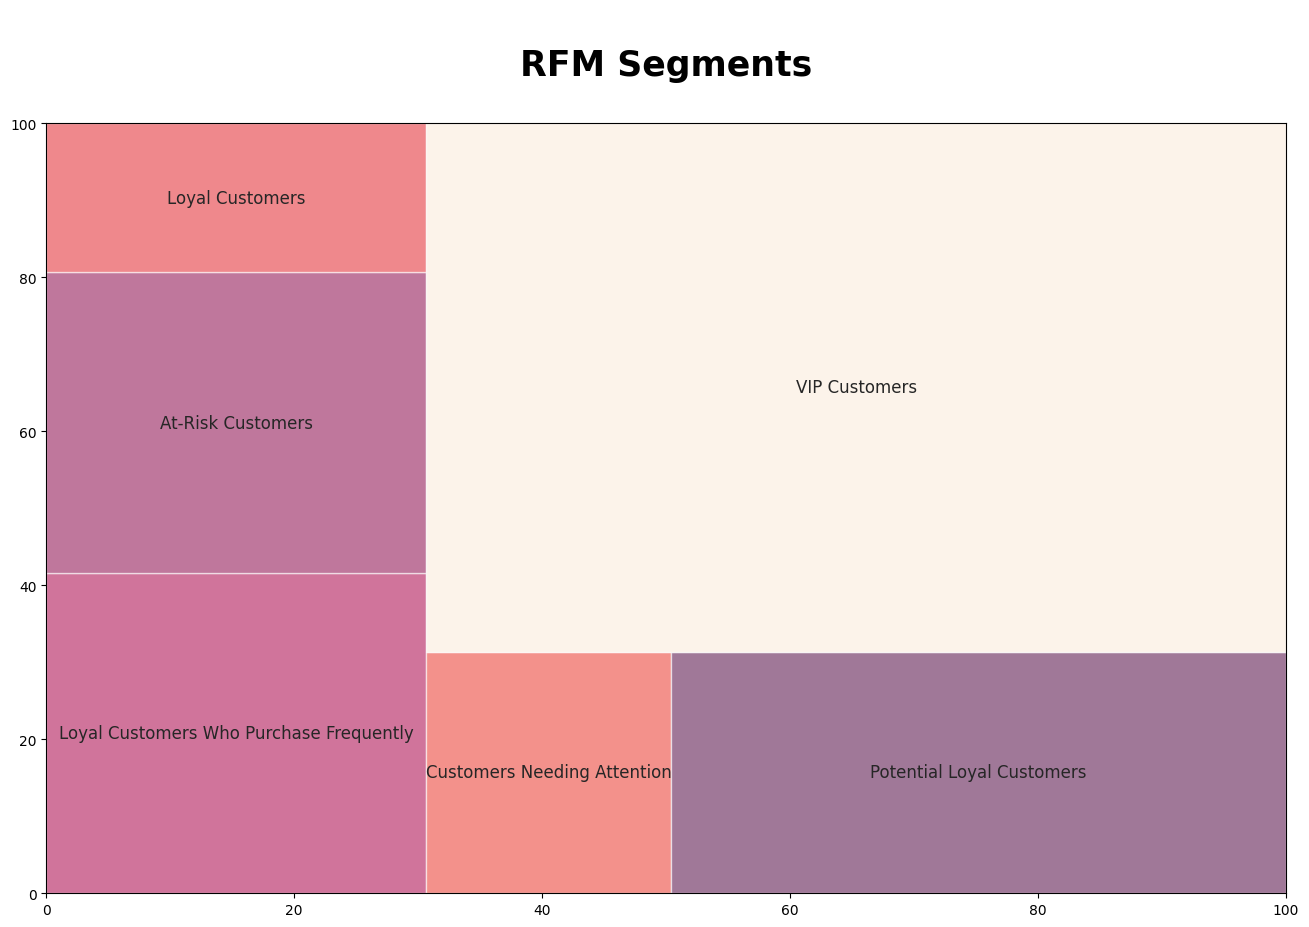

In [74]:
#69 Plot
rfm_level_agg.columns = ['RecencyMean', 'FrequencyMean', 'MonetaryMean', 'Count', 'MarketingAction']
fig = plt.gcf()
ax = fig.add_subplot()
fig.set_size_inches(16, 10)
sns.set(color_codes=True, style='whitegrid')
squarify.plot(sizes=rfm_level_agg['Count'],
              label=['Loyal Customers Who Purchase Frequently',
                     'At-Risk Customers',
                     'Loyal Customers',
                     'Customers Needing Attention',
                     'Potential Loyal Customers',
                     'VIP Customers'], alpha=.6)

plt.title("\nRFM Segments\n", fontsize=25, fontweight="bold")
plt.axis('on')
plt.show()

In [81]:
#70 Now the interactive dashboard with customer segments
fig = go.Figure(go.Treemap(
    # Setting labels for customer segments
    labels=rfm_level_ag['Customer Segment'],

    # Defining hierarchy (all segments under 'Overall')
    parents=['Overall', 'Overall', 'Overall', 'Overall', 'Overall', 'Overall'],

    # Defining segment sizes using monetary count
    values=rfm_level_ag[('Monetary', 'count')],

    # Formatting custom text with absolute and percentage values
    texttemplate="<b>%{label}</b><br>Count: %{value:,}<br>%{percentRoot:.1%}",

    # Styling text information (optional for enhanced visuals)
    textinfo="label+value+percent entry",

    # Using a distinct color scale for improved contrast
    marker=dict(colorscale='Viridis', line=dict(width=0.5))
))

# Customizing layout for better visual presentation
fig.update_layout(
    title=dict(text="<b>Customer Segments Treemap</b>", font=dict(size=24, color="black")),
    margin=dict(t=50, l=25, r=25, b=25)  # Adjusting margins
)

# Displaying the interactive treemap
fig.show()


In [76]:
%reload_ext watermark
%watermark -a "panData"

Author: panData



In [77]:
%watermark -v -m

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.34.0

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.1.85+
Machine     : x86_64
Processor   : x86_64
CPU cores   : 2
Architecture: 64bit



In [78]:
%watermark --iversions

seaborn   : 0.13.2
matplotlib: 3.8.0
plotly    : 5.24.1
sklearn   : 1.5.2
squarify  : 0.4.4
pandas    : 2.2.2



# **The End**